In [4]:
from nltk import FreqDist, classify, NaiveBayesClassifier

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#!conda install nltk -y

In [6]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [7]:
import pandas as pd

#### TRANSCRIPTS

In [8]:
amazon_transcript = pd.read_csv('data/Amazon/AMAZON_Transcripts.csv')
tesla_transcript = pd.read_csv('data/Tesla/TESLA_Transcripts.csv')
blackrock_transcript = pd.read_csv('data/BlackRock/BLACKROCK_Transcripts.csv')

In [9]:
amazon_transcript_date = pd.read_csv('data/amazon_T.csv')

In [10]:
tesla_transcript_date = pd.read_csv('data/tesla_T.csv')

In [11]:
blackrock_transcript_date = pd.read_csv('data/blackrock_T.csv')

#### STOCK PRICES

In [12]:
tesla_stock = pd.read_csv('data/stocks/TSLA.csv')
blackrock_stock = pd.read_csv('data/stocks/BLK.csv')
amazon_stock = pd.read_csv('data/stocks/AMZN.csv')
nasdaq_stock = pd.read_csv('data/stocks/^IXIC.csv')
s_p_stock = pd.read_csv('data/stocks/^GSPC.csv')
s_p_stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2058.199951,2708700000
1,2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,2020.579956,3799120000
2,2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,2002.609985,4460110000
3,2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,2025.900024,3805480000
4,2015-01-08,2030.609985,2064.080078,2030.609985,2062.139893,2062.139893,3934010000
...,...,...,...,...,...,...,...
1436,2020-09-16,3411.229980,3428.919922,3384.449951,3385.489990,3385.489990,4710030000
1437,2020-09-17,3346.860107,3375.169922,3328.820068,3357.010010,3357.010010,4371940000
1438,2020-09-18,3357.379883,3362.270020,3292.399902,3319.469971,3319.469971,7068700000
1439,2020-09-21,3285.570068,3285.570068,3229.100098,3281.060059,3281.060059,4828350000


In [13]:
amazon_transcript= amazon_transcript[['date','Quarter','text']]
blackrock_transcript= blackrock_transcript[['date','Quarter','text']]
tesla_transcript= tesla_transcript[['date','Quarter','text']]

In [14]:
def change_date_format(data_f):
    data_f['date']=pd.to_datetime(data_f['date'])
    return data_f

In [15]:
tesla_transcript = change_date_format(tesla_transcript)
amazon_transcript = change_date_format(amazon_transcript)
blackrock_transcript = change_date_format(blackrock_transcript)

In [16]:
tesla_transcript['focused_date'] = tesla_transcript['date'] + pd.DateOffset(1)
blackrock_transcript['focused_date'] = blackrock_transcript['date'] + pd.DateOffset(1)
amazon_transcript['focused_date'] = amazon_transcript['date'] + pd.DateOffset(1)

In [17]:
tesla_transcript

,date,Quarter,text,focused_date
0,2020-07-22,Q2,"Tesla, Inc. (NASDAQ:TSLA) Q2 2020 Earnings Con...",2020-07-23
1,2020-04-29,Q1,"Tesla, Inc. (NASDAQ:TSLA) Q1 2020 Earnings Con...",2020-04-30
2,2020-01-29,Q4,"Tesla, Inc. (NASDAQ:TSLA) Q4 2019 Earnings Con...",2020-01-30
3,2019-10-23,Q3,"Tesla, Inc. (NASDAQ:TSLA) Q3 2019 Earnings Con...",2019-10-24
4,2019-07-24,Q2,"Tesla, Inc. (NASDAQ:TSLA) Q2 2019 Earnings Con...",2019-07-25
5,2019-04-24,Q1,"Tesla, Inc (NASDAQ:TSLA) Q1 2019 Earnings Conf...",2019-04-25
6,2019-01-30,Q4,"Tesla, Inc. (NASDAQ:TSLA) Q4 2018 Earnings Con...",2019-01-31
7,2018-10-24,Q3,Tesla Inc. (NASDAQ:TSLA) Q3 2018 Earnings Conf...,2018-10-25
8,2018-08-01,Q2,"Tesla, Inc. (NASDAQ:TSLA) Q2 2018 Earnings Cal...",2018-08-02
9,2018-05-02,Q1,"Tesla, Inc. (NASDAQ:TSLA) Q1 2018 Earnings Cal...",2018-05-03


In [18]:
tesla_transcript['focused_price'] =  tesla_transcript_date['focused_price']
tesla_transcript['next_focused_date'] =  tesla_transcript_date['next_focused_date']
tesla_transcript['next_price'] =  tesla_transcript_date['next_price']
#tesla_transcript = tesla_transcript.drop(['Unnamed: 0'], axis=1)

blackrock_transcript['focused_price'] =  blackrock_transcript_date['focused_price']
blackrock_transcript['next_focused_date'] =  blackrock_transcript_date['next_focused_date']
blackrock_transcript['next_price'] =  blackrock_transcript_date['next_price']
#blackrock_transcript = blackrock_transcript.drop(['Unnamed: 0'], axis=1)

amazon_transcript['focused_price'] = amazon_transcript_date['focused_price']
amazon_transcript['next_focused_date'] =  amazon_transcript_date['next_focused_date']
amazon_transcript['next_price'] =  amazon_transcript_date['next_price']
#amazon_transcript = amazon_transcript.drop(['Unnamed: 0'], axis=1)

In [19]:
tesla_transcript.columns

Index(['date', 'Quarter', 'text', 'focused_date', 'focused_price',
       'next_focused_date', 'next_price'],
      dtype='object')

In [20]:
amazon_transcript1=amazon_transcript.iloc[1:].copy()
blackrock_transcript1=blackrock_transcript.iloc[1:].copy()
tesla_transcript1=tesla_transcript.iloc[1:].copy()

In [21]:
#blackrock_transcript=blackrock_transcript[['date', 'Quarter', 'text', 'focused_date', 'focused_price','next_focused_date', 'next_price']]

In [22]:
data=pd.concat([blackrock_transcript1,amazon_transcript1],axis=0)

In [23]:
data=pd.concat([data,tesla_transcript1],axis=0)
data

,date,Quarter,text,focused_date,focused_price,next_focused_date,next_price
1,2020-04-16,Q1,"BlackRock, Inc. (NYSE:BLK) 2020-04-16 Q1 2020 ...",2020-04-17,476.320007,2020-07-16,565.299988
2,2020-01-15,Q4,BlackRock Inc. (NYSE:BLK) 2020-01-15 Q4 2019 E...,2020-01-16,536.909973,2020-04-15,442.48999
3,2019-10-15,Q3,"BlackRock, Inc. (NYSE:BLK) 2019-10-15 Q3 2019 ...",2019-10-16,445.000000,2020-01-14,520.150024
4,2019-07-19,Q2,"BlackRock, Inc. (NYSE:BLK) 2019-07-19 Q2 2019 ...",2019-07-20,476.299988,2019-10-14,432.290009
5,2019-04-16,Q1,"BlackRock, Inc. (NYSE:BLK) 2019-04-16 Q1 2019 ...",2019-04-17,466.980011,2019-07-18,470.859985
...,...,...,...,...,...,...,...
18,2016-02-10,Q4,"Tesla Motors, Inc. (NASDAQ:TSLA) Q4 2015 Earni...",2016-02-11,30.400000,2016-05-04,46.057999
19,2015-11-03,Q3,"Tesla Motors, Inc. (NASDAQ:TSLA) Q3 2015 Earni...",2015-11-04,45.400002,2016-02-10,30.1
20,2015-08-05,Q2,"Tesla Motors, Inc. (NASDAQ:TSLA) Q2 2015 Earni...",2015-08-06,49.908001,2015-11-03,42.77
21,2015-05-06,Q1,"Tesla Motors, Inc. (NASDAQ:TSLA) Q1 2015 Earni...",2015-05-07,44.200001,2015-08-05,52.716


In [24]:
amazon_transcript.shape

(23, 7)

In [26]:
#amazon_data1=amazon_data.iloc[1:].copy()

In [27]:
#amazon_data1['next_price']=amazon_data1['next_price'].astype(float)
#amazon_data1['focused_price']=amazon_data1['focused_price'].astype(float)

In [28]:
#amazon_data1['target']=((amazon_data1['next_price'])-(amazon_data1['focused_price']))/(amazon_data1['focused_price'])
#amazon_data1['target']

In [29]:
def change_date_format_stock(data_f):
    data_f['Date']=pd.to_datetime(data_f['Date'])
    return data_f

In [41]:
amazon_stock=change_date_format_stock(amazon_stock)
blackrock_stock=change_date_format_stock(blackrock_stock)
tesla_stock=change_date_format_stock(tesla_stock)

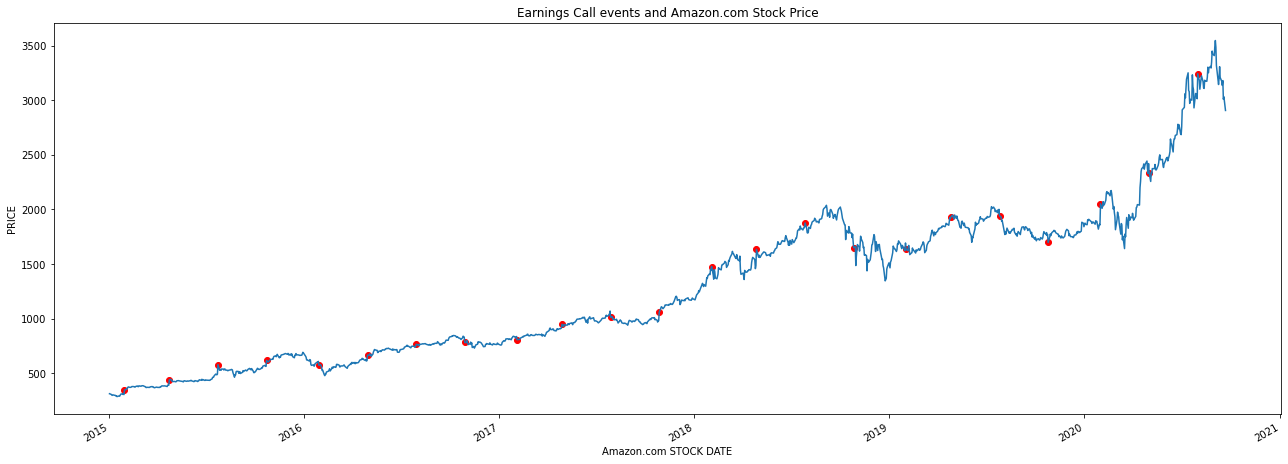

In [39]:
def plot_price_and_text(stock_data, transcript_data):
    '''
    Plots the dates of a company's earning calls on top of a chart of the company's stock price.
    '''
    # Plot the transcript events below the price, 10% offset from min price 
    fig, ax = plt.subplots(figsize=(22,8))
    ax.scatter(transcript_data['focused_date'], transcript_data['focused_price'], color='red')
    ax.plot(stock_data['Date'], stock_data['Open'])
    fig.autofmt_xdate()
    ax.set_title('Earnings Call events and {} Stock Price'.format(transcript_data.iloc[2, 2][:10]))
    ax.set_xlabel('{} STOCK DATE'.format(transcript_data.iloc[2, 2][:10]))
    ax.set_ylabel('PRICE')
plot_price_and_text(amazon_stock, amazon_transcript)

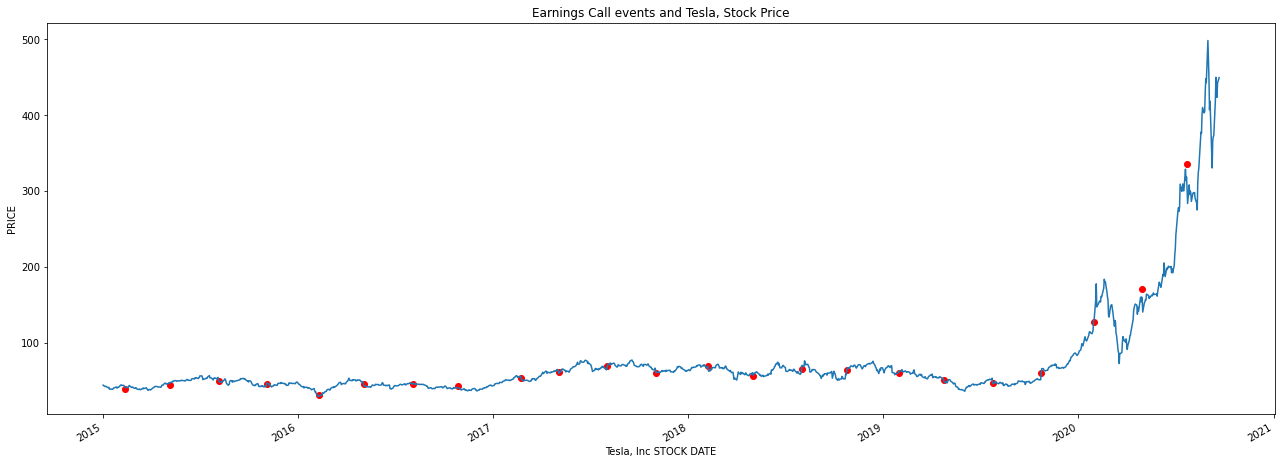

In [47]:
def plot_price_and_text1(stock_data, transcript_data):
    '''
    Plots the dates of a company's earning calls on top of a chart of the company's stock price.
    '''
    # Plot the transcript events below the price, 10% offset from min price 
    fig, ax = plt.subplots(figsize=(22,8))
    ax.scatter(transcript_data['focused_date'], transcript_data['focused_price'], color='red')
    ax.plot(stock_data['Date'], stock_data['Close'])
    fig.autofmt_xdate()
    ax.set_title('Earnings Call events and {} Stock Price'.format(transcript_data.iloc[2, 2][:6]))
    ax.set_xlabel('{} STOCK DATE'.format(transcript_data.iloc[2, 2][:10]))
    ax.set_ylabel('PRICE')
plot_price_and_text1(tesla_stock, tesla_transcript)

In [48]:
blackrock_transcript['word_count']=blackrock_transcript['text'].str.len()
amazon_transcript['word_count'] = amazon_transcript['text'].str.len()
tesla_transcript['word_count'] = tesla_transcript['text'].str.len()

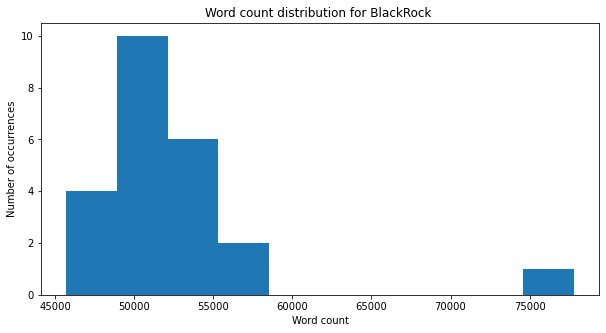

In [49]:
# Plot histogram of word counts for transcripts
def visualize_word_count(transcripts):
    '''
    Plots a histogram of a company's transcript word counts.
    
    Args:
        transcripts: A Pandas DataFrame containing a company's history of earnings calls.
    '''
    
    fig, ax = plt.subplots(figsize=(10,5))
    ax.hist(transcripts['word_count'])
    plt.title("Word count distribution for {}".format(transcripts.iloc[2, 2][:10]))
    ax.set_xlabel('Word count')
    ax.set_ylabel('Number of occurrences')

visualize_word_count(blackrock_transcript)

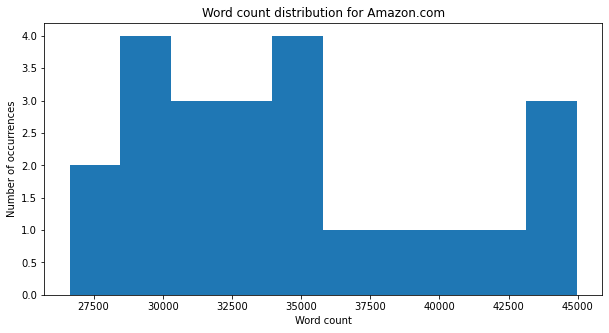

In [50]:
visualize_word_count(amazon_transcript)

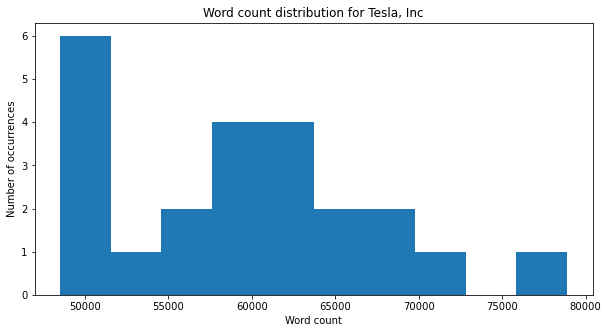

In [51]:
visualize_word_count(tesla_transcript)

In [52]:
documents3 = amazon_transcript['text']
documents1 = blackrock_transcript['text']
documents2 = tesla_transcript['text']
documents = data['text']
#amazon_transcript['text'][17]

In [53]:
stop = set(stopwords.words('english'))

In [54]:
sent_tokens = [sent_tokenize(content) for content in documents]
docs = [word_tokenize(content) for content in documents.str.lower()]
#docs[0]

In [55]:
#tokens for each doc
tokens1 = [sent for sent in map(word_tokenize, sent_tokens[0])]
tokens2 = [sent for sent in map(word_tokenize, sent_tokens[1])]
tokens3 = [sent for sent in map(word_tokenize, sent_tokens[2])]
tokens4 = [sent for sent in map(word_tokenize, sent_tokens[3])]
tokens5 = [sent for sent in map(word_tokenize, sent_tokens[4])]
tokens6 = [sent for sent in map(word_tokenize, sent_tokens[5])]
tokens7 = [sent for sent in map(word_tokenize, sent_tokens[6])]
tokens8 = [sent for sent in map(word_tokenize, sent_tokens[7])]
tokens9 = [sent for sent in map(word_tokenize, sent_tokens[8])]
tokens10 = [sent for sent in map(word_tokenize, sent_tokens[9])]
tokens11 = [sent for sent in map(word_tokenize, sent_tokens[10])]
tokens12 = [sent for sent in map(word_tokenize, sent_tokens[11])]
tokens13 = [sent for sent in map(word_tokenize, sent_tokens[12])]
tokens14 = [sent for sent in map(word_tokenize, sent_tokens[13])]
tokens15 = [sent for sent in map(word_tokenize, sent_tokens[14])]
tokens16 = [sent for sent in map(word_tokenize, sent_tokens[15])]
tokens17 = [sent for sent in map(word_tokenize, sent_tokens[16])]
tokens18 = [sent for sent in map(word_tokenize, sent_tokens[17])]
tokens19 = [sent for sent in map(word_tokenize, sent_tokens[18])]
tokens20 = [sent for sent in map(word_tokenize, sent_tokens[19])]
tokens21 = [sent for sent in map(word_tokenize, sent_tokens[20])]
tokens22 = [sent for sent in map(word_tokenize, sent_tokens[21])]
tokens23 = [sent for sent in map(word_tokenize, sent_tokens[22])]

In [56]:
#list(enumerate(tokens23))

### STOP WORDS

In [57]:
porter = PorterStemmer()
snowball = SnowballStemmer('english')
wordnet = WordNetLemmatizer()
docs_porter = [[porter.stem(word) for word in words] for words in docs]
docs_wordnet = [[wordnet.lemmatize(word) for word in words] for words in docs]

In [58]:
docs_snowball = [[snowball.stem(word) for word in words] for words in docs_wordnet]

In [59]:
for i in range(min(len(docs_porter[0]), len(docs_snowball[0]), len(docs_wordnet[0]))):
    p, s, w = docs_porter[0][i], docs_snowball[0][i], docs_wordnet[0][i]
    if len(set((p, s, w))) != 1:
        print("{}\t{}\t{}\t{}".format(docs[0][i], p, s, w))

conference	confer	confer	conference
eps	ep	ep	eps
revenue	revenu	revenu	revenue
y/y	y/i	y/i	y/y
company	compani	compani	company
participants	particip	particip	participant
chris	chri	chris	chris
meade	mead	mead	meade
general	gener	general	general
larry	larri	larri	larry
executive	execut	execut	executive
officer	offic	offic	officer
gary	gari	gari	gary
financial	financi	financi	financial
officer	offic	offic	officer
operating	oper	oper	operating
officer	offic	offic	officer
solutions	solut	solut	solution
ishares	ishar	ishar	ishares
investments	invest	invest	investment
president	presid	presid	president
conference	confer	confer	conference
participants	particip	particip	participant
cyprys	cypri	cypri	cyprys
siegenthaler	siegenthal	siegenthal	siegenthaler
suisse	suiss	suiss	suisse
autonomous	autonom	autonom	autonomous
jefferies	jefferi	jefferi	jefferies
operator	oper	oper	operator
morning	morn	morn	morning
amy	ami	ami	amy
conference	confer	confer	conference
facilitator	facilit	facilit	facilitat

In [60]:
pos_tagged = [pos_tag(tokens) for tokens in docs]
#pos_tagged

In [61]:
docs = docs_snowball
vocab_set = set()
[[vocab_set.add(token) for token in tokens] for tokens in docs]
vocab = list(vocab_set)
vocab[0]

'5.24'

In [62]:
matrix = [[0] * len(vocab) for doc in docs]
vocab_dict = dict((word, i) for i, word in enumerate(vocab))
for i, words in enumerate(docs):
    for word in words:
        matrix[i][vocab_dict[word]] += 1

In [63]:
cv1 = CountVectorizer(stop_words=['english','yes', 'you', 'your','year','years','youssef','yourself',
                                                   'yeah','would','line','worthington','and','world',
                                                   'worth','working','work','wondering','with','within',
                                                   'willing','will','why','who','which','while','when',
                                                   'where','whether','what','went','were','well',
                                                   'we','were','week','weeks','way','ways','was',
                                                   'welcome','views','view','website'],ngram_range=(2,2),max_df=0.70, min_df=0.12)
cv2 = CountVectorizer(stop_words=['english','yes', 'you', 'your','year','years','youssef','yourself',
                                                   'yeah','would','line','worthington','and','world',
                                                   'worth','working','work','wondering','with','within',
                                                   'willing','will','why','who','which','while','when',
                                                   'where','whether','what','went','were','well',
                                                   'we','were','week','weeks','way','ways','was',
                                                   'welcome','views','view','website'],ngram_range=(2,2),max_df=0.70, min_df=0.12)
cv3 = CountVectorizer(stop_words=['english','yes', 'you', 'your','year','years','youssef','yourself',
                                                   'yeah','would','line','worthington','and','world',
                                                   'worth','working','work','wondering','with','within',
                                                   'willing','will','why','who','which','while','when',
                                                   'where','whether','what','went','were','well',
                                                   'we','were','week','weeks','way','ways','was',
                                                   'welcome','views','view','website'],ngram_range=(2,2),max_df=0.70, min_df=0.12)

tfidf1 = TfidfVectorizer(lowercase=True,stop_words=['english','yes', 'you', 'your','year','years','youssef','yourself',
                                                   'yeah','would','line','worthington','and','world',
                                                   'worth','working','work','wondering','with','within',
                                                   'willing','will','why','who','which','while','when',
                                                   'where','whether','what','went','were','well',
                                                   'we','were','week','weeks','way','ways','was',
                                                   'welcome','views','view','website'],ngram_range=(2,2),max_df=0.70, min_df=0.12)

tfidf2 = TfidfVectorizer(lowercase=True,stop_words=['english','yes', 'you', 'your','year','years','youssef','yourself',
                                                   'yeah','would','line','worthington','and','world',
                                                   'worth','working','work','wondering','with','within',
                                                   'willing','will','why','who','which','while','when',
                                                   'where','whether','what','went','were','well',
                                                   'we','were','week','weeks','way','ways','was',
                                                   'welcome','views','view','website'],ngram_range=(2,2),max_df=0.70, min_df=0.12)

tfidf3 = TfidfVectorizer(lowercase=True,stop_words=['english','yes', 'you', 'your','year','years','youssef','yourself',
                                                   'yeah','would','line','worthington','and','world',
                                                   'worth','working','work','wondering','with','within',
                                                   'willing','will','why','who','which','while','when',
                                                   'where','whether','what','went','were','well',
                                                   'we','were','week','weeks','way','ways','was',
                                                   'welcome','views','view','website'],ngram_range=(2,2),max_df=0.70, min_df=0.12)

In [64]:
cv = CountVectorizer(stop_words=['english','yes', 'you', 'your','year','years','youssef','yourself',
                                                   'yeah','would','line','worthington','and','world',
                                                   'worth','working','work','wondering','with','within',
                                                   'willing','will','why','who','which','while','when',
                                                   'where','whether','what','went','were','well',
                                                   'we','were','week','weeks','way','ways','was',
                                                   'welcome','views','view','website','operator','thank',
                                                    'chief','executive','chairman','the','from','of',
                                                     'officer','co','llc','quarter','morning','reeve','very'],ngram_range=(2,2),max_df=0.70, min_df=0.12)
vectorized = cv.fit_transform(documents)
vectorized_blackrock  = cv1.fit_transform(documents1)
vectorized_tesla = cv2.fit_transform(documents2)
vectorized_amazon = cv3.fit_transform(documents3)


tfidf = TfidfVectorizer(lowercase=True,stop_words=['english','yes', 'you', 'your','year','years','youssef','yourself',
                                                   'yeah','would','line','worthington','and','world',
                                                   'worth','working','work','wondering','with','within',
                                                   'willing','will','why','who','which','while','when',
                                                   'where','whether','what','went','were','well',
                                                   'we','were','week','weeks','way','ways','was',
                                                   'welcome','views','view','website','operator','thank',
                                                   'chief','executive','chairman','the','from','of','officer',
                                                   'co','llc','quarter','morning','reeve','very','we','wants','want','ve'],ngram_range=(2,2),max_df=0.70, min_df=0.12)
tfidfed = tfidf.fit_transform(documents)
tfidfed_blackrock = tfidf1.fit_transform(documents1)
tfidfed_tesla = tfidf2.fit_transform(documents2)
tfidfed_amazon = tfidf3.fit_transform(documents3)

In [65]:
total_dict = cv.vocabulary_
max(total_dict.values())

5956

In [66]:
#!conda install yellowbrick -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.5

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - yellowbrick


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    yellowbrick-1.1            |     pyh9f0ad1d_0         149 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         149 KB

The following NEW packages will be INSTALLED:

  yellowbrick        conda-forge/noarch::yellowbrick-1.1-pyh9f0ad1d_0



yellowbrick-1.1      | 149 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


/opt/conda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


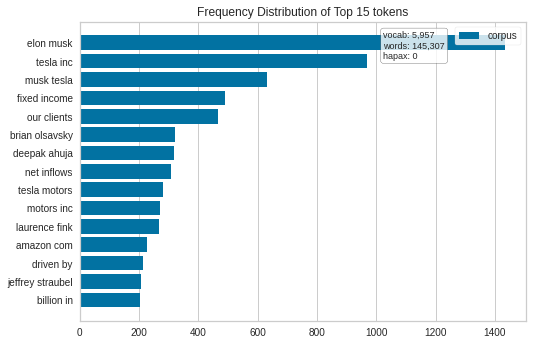

In [67]:
from yellowbrick.text import FreqDistVisualizer

features = cv.get_feature_names()

visualizer = FreqDistVisualizer(n=15,features=features, orient='h')
visualizer.fit(vectorized)
visualizer.show()


In [68]:
#print(sorted(tfidfed.vocabulary_))
tfidf.get_feature_names()[0]

'00 pm'

In [69]:
cv.get_feature_names()[500:535]

['as reminder',
 'as result',
 'as rob',
 'as saw',
 'as say',
 'as see',
 'as so',
 'as some',
 'as soon',
 'as sort',
 'as start',
 'as strong',
 'as suggested',
 'as talked',
 'as technology',
 'as that',
 'as they',
 'as think',
 'as this',
 'as those',
 'as to',
 'as today',
 'as usual',
 'as whole',
 'ask about',
 'ask question',
 'asked about',
 'asking about',
 'asset allocation',
 'asset class',
 'asset classes',
 'asset flows',
 'asset growth',
 'asset income',
 'asset management']

In [70]:
X = pd.DataFrame(tfidfed.todense(),columns=tfidf.get_feature_names())


In [71]:
X

,00 pm,000 cars,000 in,000 model,000 or,000 per,000 to,000 unit,000 units,000 vehicles,...,webcast joined,webcast our,whole foods,whole lot,wide range,wolfe research,wonder if,wonderful day,worried about,zev credits
0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.0,0.079087,0.000000,0.0,0.000000,0.00000,0.010686,0.012421,0.000000,0.029716,...,0.009246,0.0,0.0,0.012872,0.0,0.0,0.0,0.000000,0.000000,0.012421
62,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.057823,0.019274,...,0.008995,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.011688,0.036254
63,0.0,0.031067,0.000000,0.0,0.000000,0.00000,0.000000,0.011385,0.081711,0.027237,...,0.008474,0.0,0.0,0.000000,0.0,0.0,0.0,0.010065,0.000000,0.000000
64,0.0,0.000000,0.010767,0.0,0.008707,0.01039,0.000000,0.000000,0.000000,0.008285,...,0.007734,0.0,0.0,0.010767,0.0,0.0,0.0,0.009185,0.000000,0.083117


In [72]:
#df = pd.DataFrame(X.T.todense(), index=tfidf.get_feature_names(), columns=["tfidf"])
#df.sort_values(by=["tfidf"],ascending=False).head(n=100)

In [73]:
tfidfed.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.03106677, 0.        , ..., 0.01006487, 0.        ,
         0.        ],
        [0.        , 0.        , 0.01076688, ..., 0.0091851 , 0.        ,
         0.08311745],
        [0.        , 0.03253948, 0.        , ..., 0.        , 0.0115329 ,
         0.01192453]])

In [77]:
#!conda install wordcloud -y

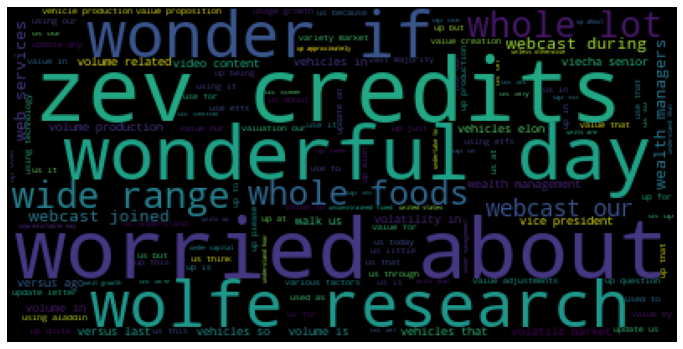

In [78]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,8))
wordcloud = WordCloud().generate_from_frequencies(tfidf.vocabulary_)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [79]:
from PIL import Image

In [80]:
#!conda install textblob -y
#!conda install textacy -y
#!pip install textacy
#!conda install -c conda-forge spacy -y
#!python -m spacy download en_core_web_sm
#!pip3 install spacy
#!python3 -m spacy download en_core_web_sm


In [81]:
#Gives error
#nlp = spacy.load("en_core_web_sm")

In [82]:
!pip install textblob

     |████████████████████████████████| 636 kB 1.7 MB/s eta 0:00:01


In [83]:
documents.shape

(66,)

In [87]:
def sentiment_by_sentence(text, doc_id, default):
    sentiment_df = pd.DataFrame(columns = ["date", "doc_id", "polarity", "subjectivity", "progress"])
    tb = TextBlob(text)
    sent_id = 0
    num_sents = len(tb.sentences)
    for sent in tb.sentences:
        sentiment = sent.sentiment
        sentiment_df.loc[sent_id] = [default, doc_id, sentiment.polarity, sentiment.subjectivity, round((sent_id+1)/num_sents,4)]
        sent_id += 1
    return sentiment_df

In [88]:
#sentiment_by_sentence(documents[0], 0, data['date'][0])

In [89]:
data

,date,Quarter,text,focused_date,focused_price,next_focused_date,next_price
1,2020-04-16,Q1,"BlackRock, Inc. (NYSE:BLK) 2020-04-16 Q1 2020 ...",2020-04-17,476.320007,2020-07-16,565.299988
2,2020-01-15,Q4,BlackRock Inc. (NYSE:BLK) 2020-01-15 Q4 2019 E...,2020-01-16,536.909973,2020-04-15,442.48999
3,2019-10-15,Q3,"BlackRock, Inc. (NYSE:BLK) 2019-10-15 Q3 2019 ...",2019-10-16,445.000000,2020-01-14,520.150024
4,2019-07-19,Q2,"BlackRock, Inc. (NYSE:BLK) 2019-07-19 Q2 2019 ...",2019-07-20,476.299988,2019-10-14,432.290009
5,2019-04-16,Q1,"BlackRock, Inc. (NYSE:BLK) 2019-04-16 Q1 2019 ...",2019-04-17,466.980011,2019-07-18,470.859985
...,...,...,...,...,...,...,...
18,2016-02-10,Q4,"Tesla Motors, Inc. (NASDAQ:TSLA) Q4 2015 Earni...",2016-02-11,30.400000,2016-05-04,46.057999
19,2015-11-03,Q3,"Tesla Motors, Inc. (NASDAQ:TSLA) Q3 2015 Earni...",2015-11-04,45.400002,2016-02-10,30.1
20,2015-08-05,Q2,"Tesla Motors, Inc. (NASDAQ:TSLA) Q2 2015 Earni...",2015-08-06,49.908001,2015-11-03,42.77
21,2015-05-06,Q1,"Tesla Motors, Inc. (NASDAQ:TSLA) Q1 2015 Earni...",2015-05-07,44.200001,2015-08-05,52.716


In [90]:
data['next_price']=data['next_price'].astype(float)
data['focused_price']=data['focused_price'].astype(float)

In [91]:
amazon_transcript['date'][0]

Timestamp('2020-07-30 00:00:00')

In [92]:
print(data.shape,X.shape)

(66, 7) (66, 5930)


In [93]:
data.reset_index(inplace = True)

In [94]:
data=pd.concat([data,X],axis=1)

In [95]:
data['target']=((data['next_price'])-(data['focused_price']))/(data['focused_price'])
data['target']

0     0.186807
1    -0.175858
2     0.168876
3    -0.092400
4     0.008309
        ...   
61    0.515066
62   -0.337004
63   -0.143023
64    0.192670
65    0.209382
Name: target, Length: 66, dtype: float64

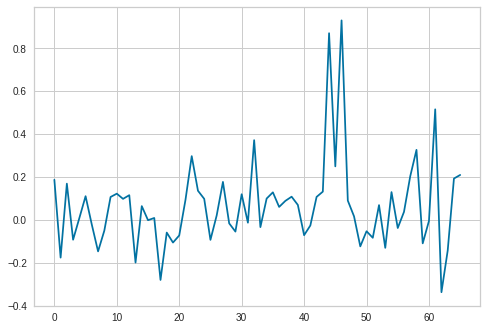

In [96]:
plt.plot(data.index,data['target'])
plt.show()

In [97]:
data['target_class'] = data['target'].apply(lambda x: 1 if x > 0.0 else 0)

In [98]:
data

,index,date,Quarter,text,focused_date,focused_price,next_focused_date,next_price,00 pm,000 cars,...,whole foods,whole lot,wide range,wolfe research,wonder if,wonderful day,worried about,zev credits,target,target_class
0,1,2020-04-16,Q1,"BlackRock, Inc. (NYSE:BLK) 2020-04-16 Q1 2020 ...",2020-04-17,476.320007,2020-07-16,565.299988,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.186807,1
1,2,2020-01-15,Q4,BlackRock Inc. (NYSE:BLK) 2020-01-15 Q4 2019 E...,2020-01-16,536.909973,2020-04-15,442.489990,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,-0.175858,0
2,3,2019-10-15,Q3,"BlackRock, Inc. (NYSE:BLK) 2019-10-15 Q3 2019 ...",2019-10-16,445.000000,2020-01-14,520.150024,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.168876,1
3,4,2019-07-19,Q2,"BlackRock, Inc. (NYSE:BLK) 2019-07-19 Q2 2019 ...",2019-07-20,476.299988,2019-10-14,432.290009,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,-0.092400,0
4,5,2019-04-16,Q1,"BlackRock, Inc. (NYSE:BLK) 2019-04-16 Q1 2019 ...",2019-04-17,466.980011,2019-07-18,470.859985,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.008309,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,18,2016-02-10,Q4,"Tesla Motors, Inc. (NASDAQ:TSLA) Q4 2015 Earni...",2016-02-11,30.400000,2016-05-04,46.057999,0.0,0.079087,...,0.0,0.012872,0.0,0.0,0.0,0.000000,0.000000,0.012421,0.515066,1
62,19,2015-11-03,Q3,"Tesla Motors, Inc. (NASDAQ:TSLA) Q3 2015 Earni...",2015-11-04,45.400002,2016-02-10,30.100000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.011688,0.036254,-0.337004,0
63,20,2015-08-05,Q2,"Tesla Motors, Inc. (NASDAQ:TSLA) Q2 2015 Earni...",2015-08-06,49.908001,2015-11-03,42.770000,0.0,0.031067,...,0.0,0.000000,0.0,0.0,0.0,0.010065,0.000000,0.000000,-0.143023,0
64,21,2015-05-06,Q1,"Tesla Motors, Inc. (NASDAQ:TSLA) Q1 2015 Earni...",2015-05-07,44.200001,2015-08-05,52.716000,0.0,0.000000,...,0.0,0.010767,0.0,0.0,0.0,0.009185,0.000000,0.083117,0.192670,1


In [99]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import r2_score, mean_squared_error

In [100]:
data1 = data.copy()

In [101]:
y=data1.pop('target_class')

In [102]:
data1.pop('target')

0     0.186807
1    -0.175858
2     0.168876
3    -0.092400
4     0.008309
        ...   
61    0.515066
62   -0.337004
63   -0.143023
64    0.192670
65    0.209382
Name: target, Length: 66, dtype: float64

In [103]:
X = data1

In [104]:
data1.columns

Index(['index', 'date', 'Quarter', 'text', 'focused_date', 'focused_price',
       'next_focused_date', 'next_price', '00 pm', '000 cars',
       ...
       'webcast joined', 'webcast our', 'whole foods', 'whole lot',
       'wide range', 'wolfe research', 'wonder if', 'wonderful day',
       'worried about', 'zev credits'],
      dtype='object', length=5938)

In [105]:
X=data1.iloc[:,8:]
X=X.astype('float')

In [106]:
X.describe()

,00 pm,000 cars,000 in,000 model,000 or,000 per,000 to,000 unit,000 units,000 vehicles,...,webcast joined,webcast our,whole foods,whole lot,wide range,wolfe research,wonder if,wonderful day,worried about,zev credits
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,...,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,0.002022,0.005652,0.001838,0.002467,0.002911,0.001951,0.004186,0.001695,0.006934,0.003427,...,0.002400,0.004734,0.033409,0.001927,0.001746,0.004020,0.003323,0.001648,0.002547,0.004233
std,0.005152,0.014770,0.005666,0.007580,0.007462,0.005691,0.010670,0.004818,0.016038,0.007123,...,0.004016,0.006851,0.093787,0.005401,0.005167,0.011147,0.008190,0.003737,0.006749,0.014172
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003717,0.003496,...,0.004333,0.012333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.020804,0.079087,0.027992,0.041823,0.048320,0.028889,0.049603,0.026295,0.081711,0.029716,...,0.012937,0.018156,0.463480,0.024444,0.022292,0.048888,0.037055,0.015034,0.031253,0.083117


In [107]:
X

,00 pm,000 cars,000 in,000 model,000 or,000 per,000 to,000 unit,000 units,000 vehicles,...,webcast joined,webcast our,whole foods,whole lot,wide range,wolfe research,wonder if,wonderful day,worried about,zev credits
0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.0,0.079087,0.000000,0.0,0.000000,0.00000,0.010686,0.012421,0.000000,0.029716,...,0.009246,0.0,0.0,0.012872,0.0,0.0,0.0,0.000000,0.000000,0.012421
62,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.057823,0.019274,...,0.008995,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.011688,0.036254
63,0.0,0.031067,0.000000,0.0,0.000000,0.00000,0.000000,0.011385,0.081711,0.027237,...,0.008474,0.0,0.0,0.000000,0.0,0.0,0.0,0.010065,0.000000,0.000000
64,0.0,0.000000,0.010767,0.0,0.008707,0.01039,0.000000,0.000000,0.000000,0.008285,...,0.007734,0.0,0.0,0.010767,0.0,0.0,0.0,0.009185,0.000000,0.083117


In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [109]:
X_train

,00 pm,000 cars,000 in,000 model,000 or,000 per,000 to,000 unit,000 units,000 vehicles,...,webcast joined,webcast our,whole foods,whole lot,wide range,wolfe research,wonder if,wonderful day,worried about,zev credits
65,0.000000,0.032539,0.000000,0.000000,0.009993,0.000000,0.010259,0.000000,0.000000,0.000000,...,0.008876,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011533,0.011925
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.014096,0.107893,0.000000,0.000000,0.000000,0.037055,0.000000,0.000000,0.000000
10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031253,0.000000
22,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.016974,0.151577,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
41,0.014664,0.000000,0.000000,0.000000,0.012706,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.010810,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
64,0.000000,0.000000,0.010767,0.000000,0.008707,0.010390,0.000000,0.000000,0.000000,0.008285,...,0.007734,0.000000,0.000000,0.010767,0.000000,0.000000,0.000000,0.009185,0.000000,0.083117
32,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.012110,0.463480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017496,0.000000


In [110]:
clf = MultinomialNB()

In [111]:
clf.fit(X_train, y_train)

MultinomialNB()

In [112]:
y_p=clf.predict(X_test)
y_p

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [113]:
mean_squared_error(y_test, y_p)

0.6428571428571429

In [114]:
clf.score(X_test,y_test)

0.35714285714285715

#### RANDOM FOREST Classifier

In [148]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [133]:
ran_clf = RandomForestClassifier(bootstrap= True,
                                 ccp_alpha= 0.0,
                                 class_weight= None,
                                 criterion= 'gini',
                                 max_depth= 5,
                                 max_features= 0.25,
                                 max_leaf_nodes= None,
                                 max_samples= None,
                                 min_impurity_decrease= 0.0,
                                 min_impurity_split= None,
                                 min_samples_leaf= 1,
                                 min_samples_split= 4,
                                 min_weight_fraction_leaf= 0.0,
                                 n_estimators= 50,
                                 n_jobs= None,
                                 oob_score= False,
                                 random_state= 0,
                                 verbose= 0,
                                 warm_start= False)

In [126]:
ran_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=0.25, min_samples_split=4,
                       n_estimators=50, random_state=0)

In [127]:
y_phat=ran_clf.predict(X_test)
y_phat

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [128]:
mean_squared_error(y_test, y_phat)

0.5714285714285714

In [129]:
ran_clf.score(X_test,y_test)

0.42857142857142855

In [149]:
precision_score(y_test, y_phat)

0.42857142857142855

In [150]:
recall_score(y_test, y_phat)

1.0

In [151]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_phat)

0.42857142857142855

In [121]:
from sklearn.model_selection import GridSearchCV

par = {
    'n_estimators': [50, 150, 250],
    'max_features': ['sqrt', 0.25, 0.5, 0.75],
    'min_samples_split': [2, 4, 6],
    'max_depth' : [5,10,20],
    'bootstrap' : [True, False]
}

gri_check = GridSearchCV(ran_clf, par, cv=2)

In [122]:
check_che = gri_check.fit(X, y)

In [123]:
# print winning set of hyperparameters
from pprint import pprint
pprint(check_che.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 0.25,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [155]:
importances = ran_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in ran_clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 5198 (0.069589)
2. feature 113 (0.050681)
3. feature 2168 (0.039521)
4. feature 1186 (0.036577)
5. feature 1549 (0.034664)
6. feature 1615 (0.034188)
7. feature 655 (0.032916)
8. feature 5183 (0.031848)
9. feature 137 (0.031396)
10. feature 231 (0.030759)
11. feature 2965 (0.029779)
12. feature 2321 (0.028361)
13. feature 5607 (0.027614)
14. feature 5526 (0.027171)
15. feature 94 (0.027059)
16. feature 2370 (0.026680)
17. feature 1773 (0.026455)
18. feature 219 (0.025940)
19. feature 1623 (0.024979)
20. feature 4611 (0.022141)
21. feature 2971 (0.021528)
22. feature 700 (0.021176)
23. feature 4319 (0.020930)
24. feature 5488 (0.020311)
25. feature 2698 (0.018212)
26. feature 5506 (0.017305)
27. feature 3416 (0.016555)
28. feature 1109 (0.016071)
29. feature 5489 (0.015663)
30. feature 4629 (0.013420)
31. feature 513 (0.012024)
32. feature 552 (0.011374)
33. feature 3536 (0.010977)
34. feature 2426 (0.010935)
35. feature 3314 (0.010834)
36. feature 4422 (0.01

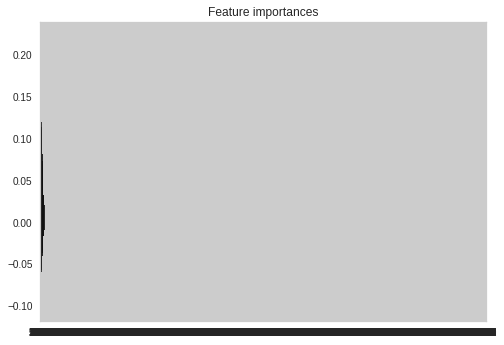

In [156]:
# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [145]:
x=(visualizer.fit(X, y))

In [147]:
type(x)

yellowbrick.model_selection.importances.FeatureImportances

/opt/conda/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


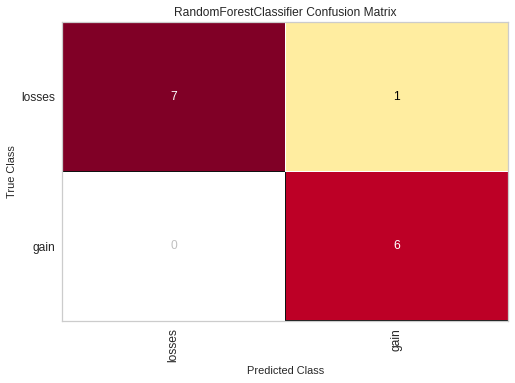

In [144]:
matrix = ConfusionMatrix(ran_clf, classes=['losses', 'gain'])
matrix.fit(X_train, y_train)
matrix.score(X_test, y_test)
matrix.show();

### RANDOM FOREST

In [137]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
y=data1.pop('target')

In [ ]:
pop('target_class')

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [212]:
regr = RandomForestRegressor(bootstrap = True,
                             ccp_alpha = 0.0,
                             criterion = 'mse',
                             max_depth = 5,
                             max_features = 'sqrt',
                             max_leaf_nodes = None,
                             max_samples = None,
                             min_impurity_decrease = 0.0,
                             min_impurity_split = None,
                             min_samples_leaf = 1,
                             min_samples_split = 4,
                             min_weight_fraction_leaf = 0.0,
                             n_estimators = 50,
                             n_jobs = None,
                             oob_score = False,
                             random_state = 0,
                             verbose = 0,
                             warm_start = False)

In [213]:
regr.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, max_features='sqrt', min_samples_split=4,
                      n_estimators=50, random_state=0)

In [214]:
y_hat=regr.predict(X_test)

In [215]:
y_hat

array([0.56666667, 0.74      , 0.74      , 0.78      , 0.67333333,
       0.72      , 0.7       , 0.64      , 0.84      , 0.53333333,
       0.78      , 0.7       , 0.7       , 0.56      , 0.4       ,
       0.36      , 0.53333333, 0.8       , 0.38      , 0.82      ])

In [216]:
mean_squared_error(y_test, y_hat)

0.3196155555555556

In [217]:
r2_score(y_test,y_hat)

-0.33173148148148135

In [145]:
from sklearn.model_selection import KFold

In [146]:
kf = KFold(n_splits=5)

In [147]:
scores = []
for X_ktrain, X_ktest in kf.split(X):
    regr.fit(X.values[X_ktrain], y.values[X_ktrain])
    ## evaluate the model on testing data!!!
    scores.append(regr.score(X.values[X_ktest], y.values[X_ktest]))
print(np.mean(scores))

-0.09918026468253949


In [148]:
scores

[-0.03462041666666682,
 -0.09577185714285652,
 -0.14045930555555564,
 -0.14890912499999964,
 -0.07614061904761882]

In [149]:
from sklearn.model_selection import GridSearchCV

par = {
    'n_estimators': [50, 150, 250],
    'max_features': ['sqrt', 0.25, 0.5, 0.75],
    'min_samples_split': [2, 4, 6],
    'max_depth' : [5,10,20],
    'bootstrap' : [True, False]
}

grid_check = GridSearchCV(regr, par, cv=2)

In [210]:
check_check = grid_check.fit(X, y)

In [211]:
# print winning set of hyperparameters
from pprint import pprint
pprint(check_check.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


#### GRADIENT BOOSTER

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train,y_train)

In [ ]:
y_pred=reg.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_pred)

In [ ]:
r2_score(y_test,y_pred)

In [291]:
print(type(docs),type(documents))

<class 'list'> <class 'pandas.core.series.Series'>


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
clf = GradientBoostingClassifier(random_state=0)

In [313]:
docsx

,0
0,"[blackrock, ,, inc., (, nyse, :, blk, ), 2020-..."
1,"[blackrock, inc., (, nyse, :, blk, ), 2020-01-..."
2,"[blackrock, ,, inc., (, nyse, :, blk, ), 2019-..."
3,"[blackrock, ,, inc., (, nyse, :, blk, ), 2019-..."
4,"[blackrock, ,, inc., (, nyse, :, blk, ), 2019-..."
...,...
61,"[tesla, motors, ,, inc., (, nasdaq, :, tsla, )..."
62,"[tesla, motors, ,, inc., (, nasdaq, :, tsla, )..."
63,"[tesla, motors, ,, inc., (, nasdaq, :, tsla, )..."
64,"[tesla, motors, ,, inc., (, nasdaq, :, tsla, )..."


In [490]:
documents.shape

(66,)

### SENTIMENT ANALYSIS

In [504]:
# TextBlob Sentiment Analysis
from textblob import TextBlob

desc_blob = [TextBlob(desc) for desc in data['text']]
data['sentiment'] = [a.sentiment for a in desc_blob]
data['polarity'] = [b.polarity for b in desc_blob]
data['subjectivity'] = [c.subjectivity for c in desc_blob]

In [505]:
data

,index,date,Quarter,text,focused_date,focused_price,next_focused_date,next_price,00 pm,000 and,...,worth of,worth of shares,yet and,yield and,zev credits,target,target_class,sentiment,polarity,subjectivity
0,1,2020-04-16,Q1,"BlackRock, Inc. (NYSE:BLK) 2020-04-16 Q1 2020 ...",2020-04-17,476.320007,2020-07-16,565.299988,0.0,0.000000,...,0.014672,0.000000,0.000000,0.000000,0.000000,0.186807,1,"(0.15808925938103127, 0.4454342489905779)",0.158089,0.445434
1,2,2020-01-15,Q4,BlackRock Inc. (NYSE:BLK) 2020-01-15 Q4 2019 E...,2020-01-16,536.909973,2020-04-15,442.489990,0.0,0.000000,...,0.008374,0.011745,0.000000,0.000000,0.000000,-0.175858,0,"(0.1618134858436581, 0.44865595167011374)",0.161813,0.448656
2,3,2019-10-15,Q3,"BlackRock, Inc. (NYSE:BLK) 2019-10-15 Q3 2019 ...",2019-10-16,445.000000,2020-01-14,520.150024,0.0,0.000000,...,0.016959,0.000000,0.000000,0.000000,0.000000,0.168876,1,"(0.15199399864300528, 0.41437946637615514)",0.151994,0.414379
3,4,2019-07-19,Q2,"BlackRock, Inc. (NYSE:BLK) 2019-07-19 Q2 2019 ...",2019-07-20,476.299988,2019-10-14,432.290009,0.0,0.000000,...,0.008418,0.000000,0.000000,0.011806,0.000000,-0.092400,0,"(0.1555341699947508, 0.4070853466496611)",0.155534,0.407085
4,5,2019-04-16,Q1,"BlackRock, Inc. (NYSE:BLK) 2019-04-16 Q1 2019 ...",2019-04-17,466.980011,2019-07-18,470.859985,0.0,0.000000,...,0.008207,0.000000,0.000000,0.011511,0.000000,0.008309,1,"(0.13868432539682554, 0.421402403499278)",0.138684,0.421402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,18,2016-02-10,Q4,"Tesla Motors, Inc. (NASDAQ:TSLA) Q4 2015 Earni...",2016-02-11,30.400000,2016-05-04,46.057999,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.005393,0.515066,1,"(0.15665118751858512, 0.44712431746828524)",0.156651,0.447124
62,19,2015-11-03,Q3,"Tesla Motors, Inc. (NASDAQ:TSLA) Q3 2015 Earni...",2015-11-04,45.400002,2016-02-10,30.100000,0.0,0.004797,...,0.003760,0.000000,0.000000,0.000000,0.015821,-0.337004,0,"(0.13096988261900536, 0.43782862913564674)",0.130970,0.437829
63,20,2015-08-05,Q2,"Tesla Motors, Inc. (NASDAQ:TSLA) Q2 2015 Earni...",2015-08-06,49.908001,2015-11-03,42.770000,0.0,0.000000,...,0.003364,0.000000,0.004889,0.000000,0.000000,-0.143023,0,"(0.15617122167855055, 0.45505879016628153)",0.156171,0.455059
64,21,2015-05-06,Q1,"Tesla Motors, Inc. (NASDAQ:TSLA) Q1 2015 Earni...",2015-05-07,44.200001,2015-08-05,52.716000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.036776,0.192670,1,"(0.13994562096286225, 0.4559858998824516)",0.139946,0.455986


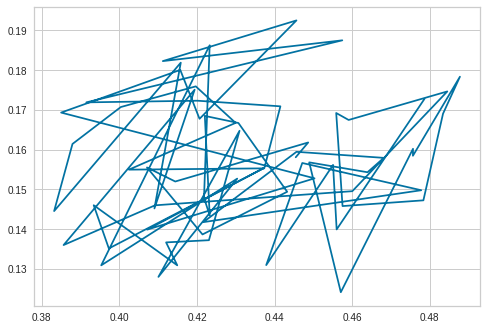

In [506]:
import matplotlib.pyplot as plt
polarity = data['polarity']
subjectivity = data['subjectivity']

plt.plot(subjectivity, polarity)

In [511]:
data[['polarity','target','target_class','subjectivity']].corr()

,polarity,target,target_class,subjectivity
polarity,1.000000,0.151680,0.095225,0.195122
target,0.151680,1.000000,0.643192,0.173607
target_class,0.095225,0.643192,1.000000,-0.032734
subjectivity,0.195122,0.173607,-0.032734,1.000000
